In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys

In [2]:
# Config
models = ["GPT-o1", "Llama3-8B", "Qwen-14B"]
DATASETS = ["camperplus", "fish&chips", "grocery", "planningpoker", "recycling", "school", "sports", "supermarket", "ticket"]

# Determine project root
cwd = Path.cwd()
project_root = Path("/Users/rexchou/Documents/GitHub/thesis_github")

# Create output folder
output_dir = project_root / "output" / "experiment" / "boxplot_picture"
output_dir.mkdir(parents=True, exist_ok=True)

In [3]:
# Collect all data
def collect_data(experiment_type):
    df_all = pd.DataFrame({
        "Dataset": pd.Series(dtype="str"),
        "Model": pd.Series(dtype="str"),
        "Run": pd.Series(dtype="int"),
        f"F-0.5 Score": pd.Series(dtype="float"),
        f"F-2 Score": pd.Series(dtype="float"),
    })

    for model in models:
        for dataset in DATASETS:
            file_path = project_root / f"output/{experiment_type}/{model}/{dataset}/experiment_results.xlsx"
            if file_path.exists():
                df2 = pd.read_excel(file_path)
                df2_tidy = pd.DataFrame({
                    "Dataset": dataset,
                    "Model": model,
                    "Run": range(1, len(df2) + 1),
                    f"F-0.5 Score": df2["F-0.5"],
                    f"F-2 Score": df2["F-2"],
                })
                df_all = pd.concat([df_all, df2_tidy], ignore_index=True)
            else:
                print(f"⚠️ File not found: {file_path}")
    return df_all

# Class Boxplot

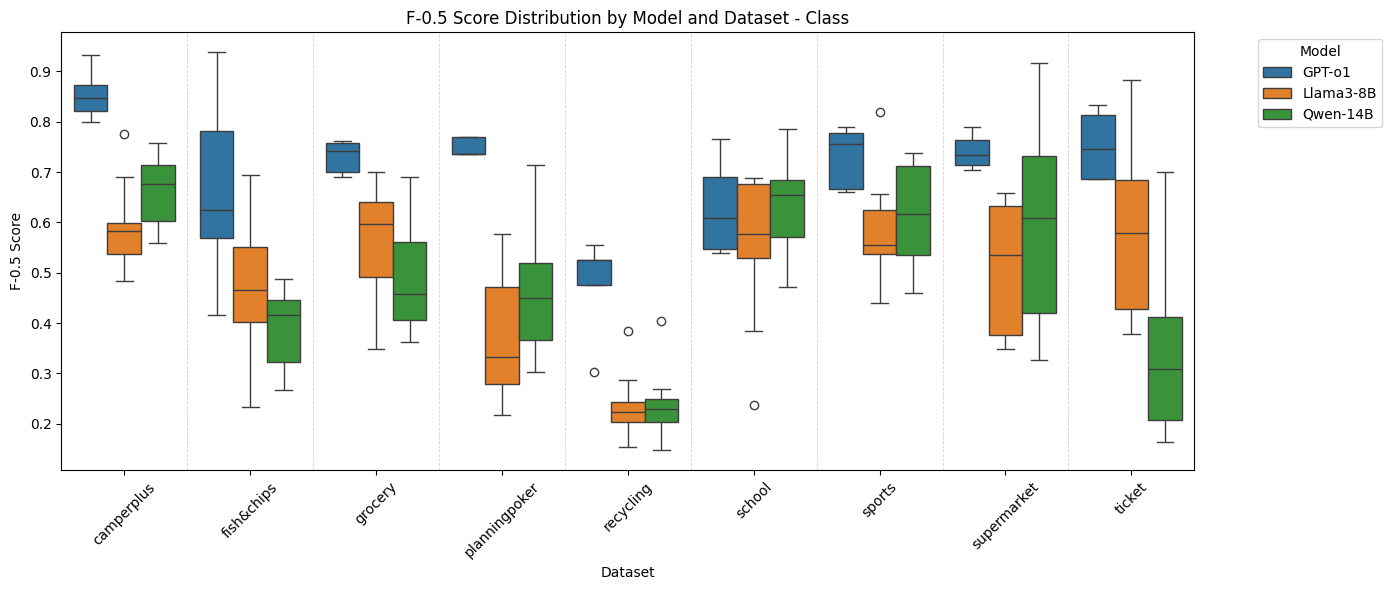

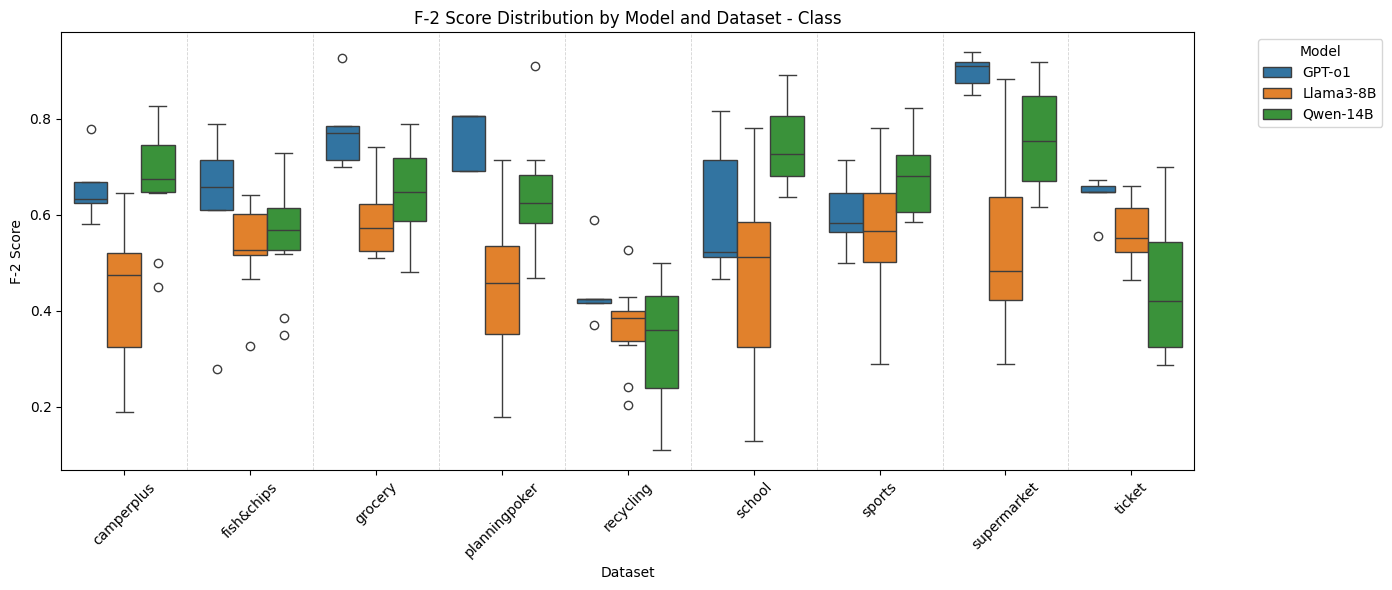

In [4]:
experiment_type = "class"
df_class = collect_data(experiment_type=experiment_type)

# Create the box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class, x="Dataset", y=f"F-0.5 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-0.5 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class, x="Dataset", y=f"F-2 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-2 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Association Boxplot

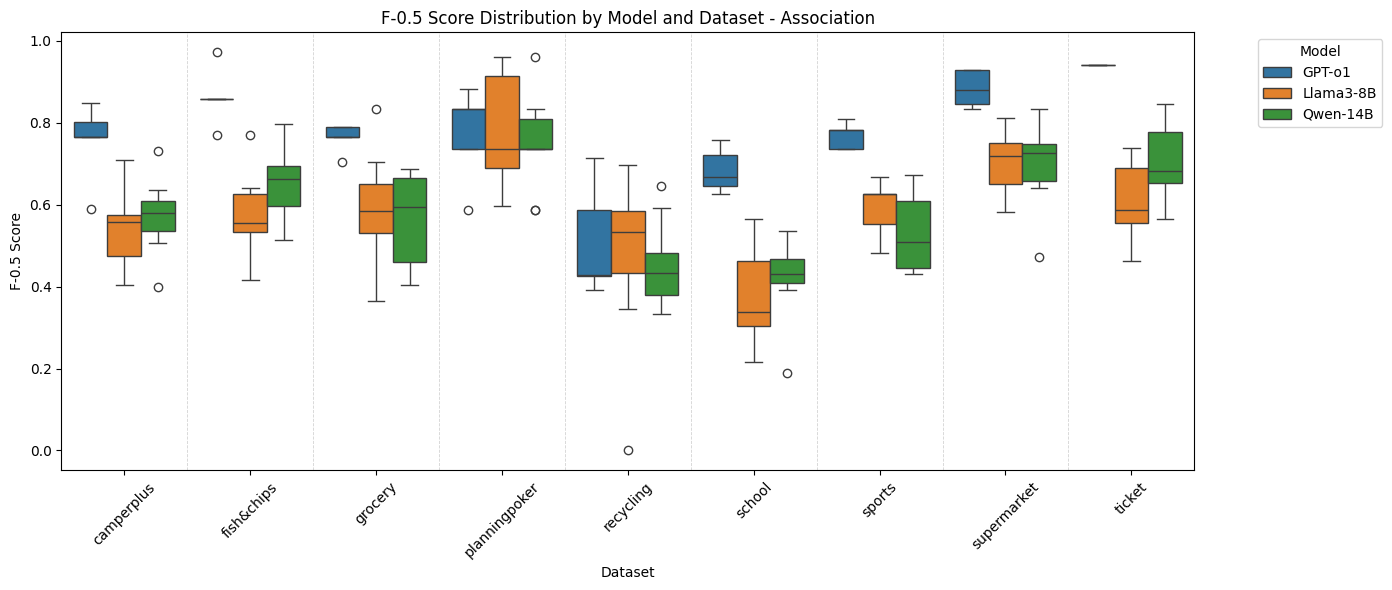

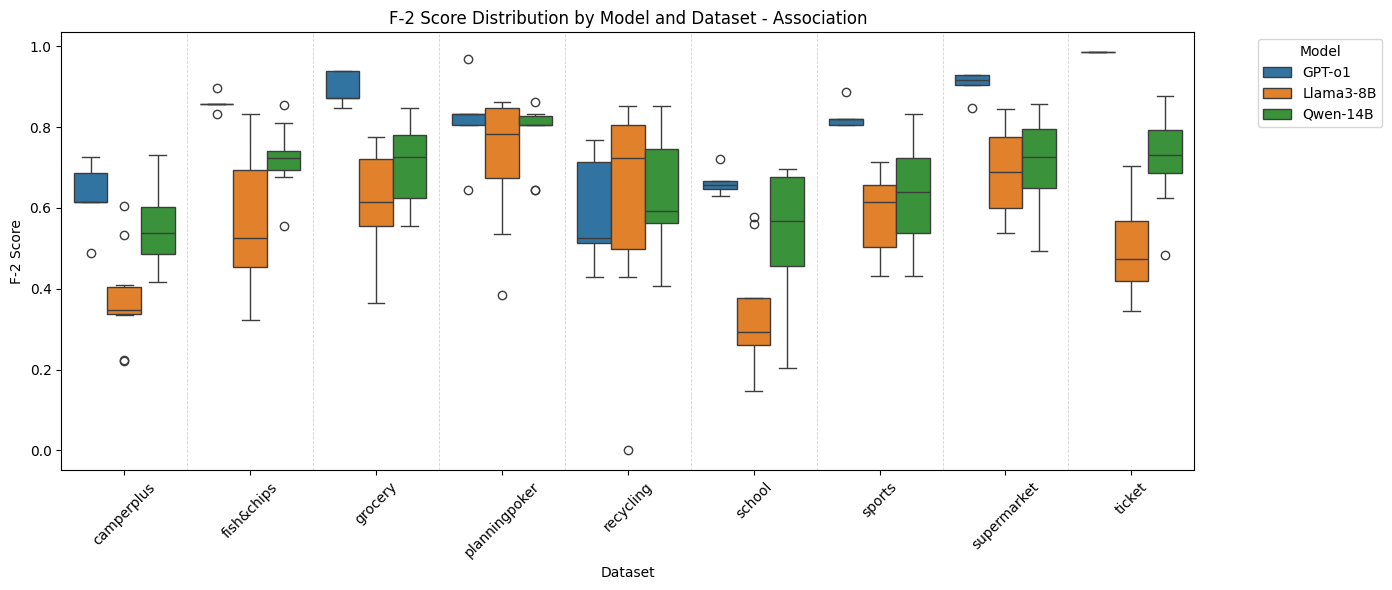

In [5]:
experiment_type = "association"
df_association = collect_data(experiment_type=experiment_type)

# Create the box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_association, x="Dataset", y=f"F-0.5 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-0.5 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_association, x="Dataset", y=f"F-2 Score", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f"F-2 Score Distribution by Model and Dataset - {experiment_type.capitalize()}")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Class FP-Analysis

In [ ]:
def collect_fp_data(experiment_type):
    model_map = {
        "count_GPT-o1": "GPT-o1",
        "count_Llama3-8B": "Llama3-8B",
        "count_Qwen-14B": "Qwen-14B"
    }

    df_all = pd.DataFrame({
        "Dataset": pd.Series(dtype="str"),
        "Model": pd.Series(dtype="str"),
        "Type": pd.Series(dtype="str"),
        "Count": pd.Series(dtype="int"),
    })  

    for dataset in DATASETS:
        fp_file_path = project_root / "output" / "experiment" / "FP_data" / f"{experiment_type}" / "Done Analysis" / f"{dataset}_unmatched(refined).xlsx"
        
        if not fp_file_path.exists():
            print(f"⚠️ File not found: {fp_file_path}")
            continue

        df = pd.read_excel(fp_file_path, sheet_name="Individual Result")
        all_types = df["type"].dropna().unique()
        summary_df = pd.DataFrame(index=all_types)

        for col, model_name in model_map.items():
            counts = df.groupby("type")[col].apply(lambda x: x.notna().sum())
            summary_df[model_name] = counts

        summary_df = summary_df.fillna(0).astype(int).sort_index().reset_index()

        for model in summary_df.columns[1:]:
            df_tidy = pd.DataFrame({
                "Dataset": dataset,
                "Model": model,
                "Type": summary_df["index"],
                "Count": summary_df[model],
            })
            df_all = pd.concat([df_all, df_tidy])
        df_all = df_all.reset_index(drop=True)
    return df_all


⚠️ File not found: /Users/rexchou/Documents/GitHub/thesis_github/output/experiment/FP_data/class/Done Analysis/camperplus_unmatched(refined).xlsx
⚠️ File not found: /Users/rexchou/Documents/GitHub/thesis_github/output/experiment/FP_data/class/Done Analysis/fish&chips_unmatched(refined).xlsx
⚠️ File not found: /Users/rexchou/Documents/GitHub/thesis_github/output/experiment/FP_data/class/Done Analysis/grocery_unmatched(refined).xlsx
⚠️ File not found: /Users/rexchou/Documents/GitHub/thesis_github/output/experiment/FP_data/class/Done Analysis/planningpoker_unmatched(refined).xlsx
⚠️ File not found: /Users/rexchou/Documents/GitHub/thesis_github/output/experiment/FP_data/class/Done Analysis/recycling_unmatched(refined).xlsx


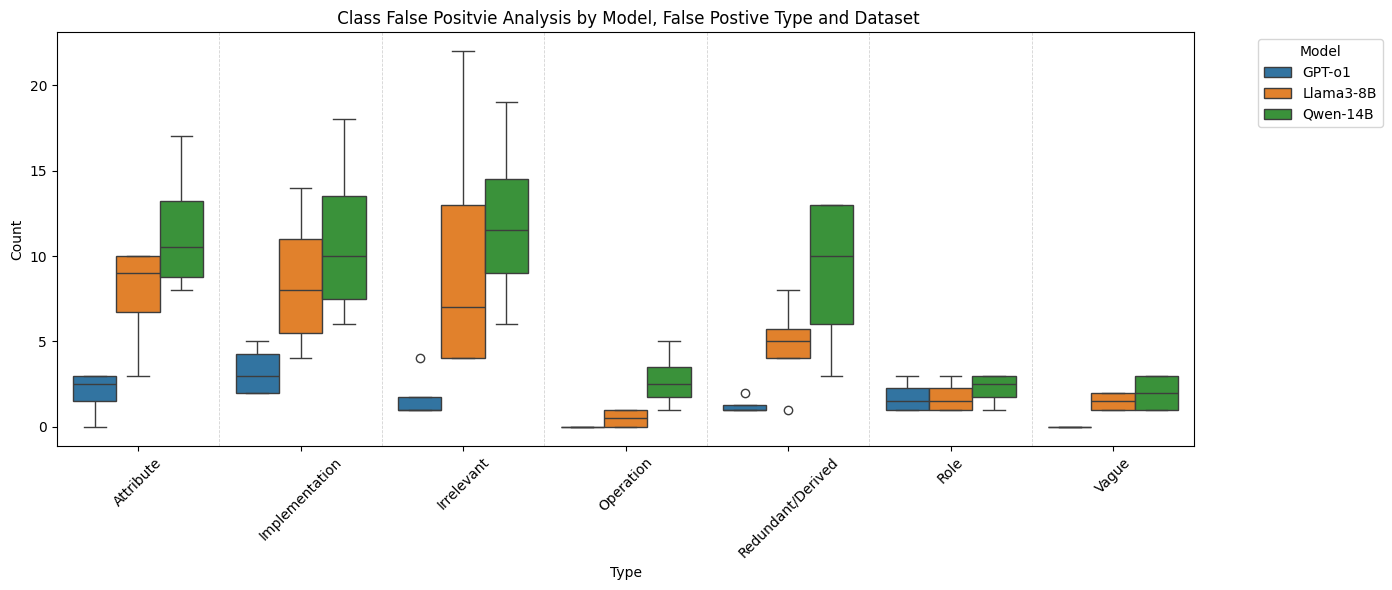

In [7]:
experiment_type = "class"
df_class_fp = collect_fp_data(experiment_type)

# Create the box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_class_fp, x="Type", y=f"Count", hue="Model")
for i in range(1, len(ax.get_xticks())):
    ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=0.6)

plt.title(f" {experiment_type.capitalize()} False Positvie Analysis by Model, False Postive Type and Dataset")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()